# Creational Patterns

The creational patterns are guidelines suggested to create objects. They provide different mechanisms to create objects in a way that code is flexible, resusable, and easy to maintain.

The five creational patterns available are:
1. Builder
2. Factory
3. Abstract Factory
4. Prototype
5. Singleton

Each of those previous patterns are unique, and can be used in different situations and conditions.

# Factory

**What is a factory?**

A factory is a class that decides which object to create. It can be used simple objects and the main purpose is switching between object combinations available. 

This design pattern is suggested when creating simple objects. If your objects needs to wrangle different pieces of code, your best decision is the builder, do not waste time with factories.

**Analogy**

If you're creating different transportation vehicles. You can choose between pickup truck or a boat. You're not actually interested to pay too much details into object options. What you really want to do create an object in a centralized way.

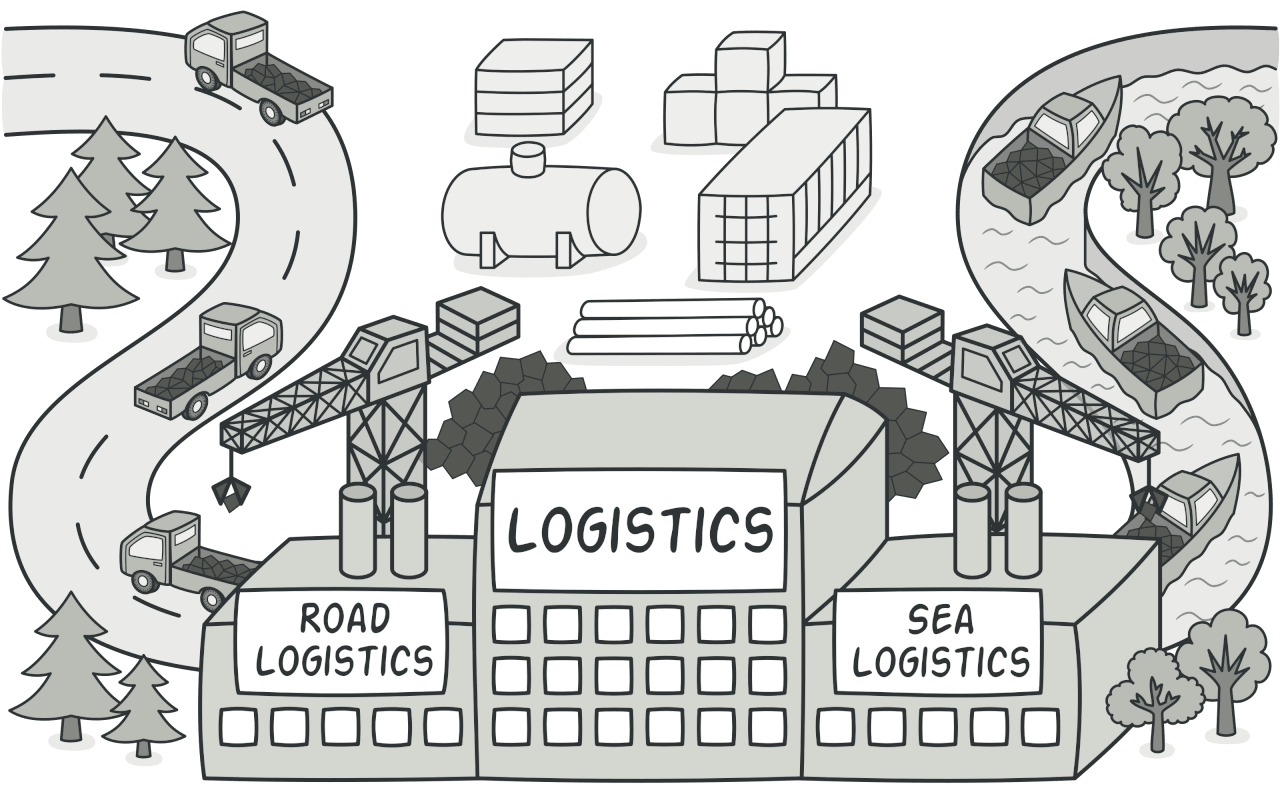

Reference: https://refactoring.guru/design-patterns/factory-method

**When should we use it?**

This is suggested when your object creation logic varies often or is config-driven by JSON/YAML or any input file.

**Scenario**

You want to train four model flavors, each of one is different:

1. Linear Regression
2. Random Forest
3. XGBoost
4. SVMRegressor

We are going to use a toy dataset about diabetes from sklearn.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import pandas as pd

In [2]:
df = load_diabetes(as_frame=True, return_X_y=True)

In [3]:
df = pd.concat([df[0], df[1]], axis=1)

Make an split for train-test

In [4]:
y = df["target"]
x = df.drop(["target"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=99
)

## Antipattern

If comming back to these days, I would create line-by-line each possible model.

1. Linear model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model1 = LinearRegression()

In [7]:
model1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred1 = model1.predict(x_test)

2. Random Forest regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
model2 = RandomForestRegressor()

In [11]:
model2.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred2 = model2.predict(x_test)

3. XGBoost

In [13]:
from xgboost import XGBRegressor

In [14]:
model3 = XGBRegressor()

In [15]:
model3.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [16]:
y_pred3 = model3.predict(x_test)

4. Train a SVMRegressor

In [17]:
from sklearn.svm import SVR

In [18]:
model4 = SVR()

In [19]:
model4.fit(x_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [20]:
y_pred4 = model4.predict(x_test)

As you saw in the previous lines of code, we fall again in the DRY. We repeated several times the same lines to perform similar actions. In this case, where we want to switch between all possible objects, it is better to encapsulate all logic in a single class, a `Factory` class.

## Pattern

In [21]:
class ModelFactory:
    @staticmethod
    def get_model(model_type: str, **kwargs):
        if model_type == "linear":
            return LinearRegression(**kwargs)
        elif model_type == "xgb":
            return XGBRegressor(**kwargs)
        elif model_type == "rf":
            return RandomForestRegressor(**kwargs)
        elif model_type == "svm":
            return SVR(**kwargs)
        else:
            raise ValueError(f"This model type is not allowed {model_type}")

Imagine we have this config file

In [22]:
config_file = {"model": "xgb"}

In [23]:
model = ModelFactory.get_model(model_type=config_file["model"])

In [24]:
model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
y_pred5 = model.predict(x_test)

So if we need to switch because we have a different request or suggestion

In [25]:
model2 = ModelFactory.get_model(model_type="linear")

In [26]:
model2

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
model2.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred6 = model2.predict(x_test)

As you saw, we can reduce the overhead of defining everytime the model class. The `Factory` design pattern  makes simple object creation and switching between the different objects.